<a href="https://colab.research.google.com/github/jeahhyun/2024-1-my-BDA/blob/main/inclass/06w_ch07_missingvalue_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 5.59 MiB/s, done.


In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'sex' : ['M','F',np.nan, 'M','F'],
                   'score' : [5,4,3,4,None]})

df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [3]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

#결측지 확인하기

In [4]:
pd.isna(df)  # 결측치 확인

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [5]:
pd.isna(df).sum()  # 결측치 빈도 확인

sex      1
score    1
dtype: int64

#결측치 제거하기

In [6]:
df.dropna(subset = ['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [7]:
df_nomiss = df.dropna(subset = ['score'])  # score 결측치 제거된 데이터 만들기
df_nomiss['score'] + 1                     # score로 연산

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

여러 변수에 결축치 없는 데이터 추출하기

In [8]:
df_nomiss = df.dropna(subset = ['score', 'sex'])  # score, sex 결측치 제거
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


결측치가 하나라도 있으면 제거하기

In [9]:
df_nomiss2 = df.dropna()  # 모든 변수에 결측치 없는 데이터 추출
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


결측치 제거하지 않고 분석하기

In [10]:
df['score'].mean()

4.0

In [11]:
df['score'].sum()

16.0

In [12]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score  = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [13]:
df.isna().sum()

sex      1
score    1
dtype: int64

In [14]:
df.isna().sum(axis=1)

0    0
1    0
2    1
3    0
4    1
dtype: int64

In [15]:
pd.Series([True,False,True]).sum()

2

In [16]:
df.isna().mean()

sex      0.2
score    0.2
dtype: float64

In [17]:
df.isna().any()

sex      True
score    True
dtype: bool

In [18]:
df.isna().all()

sex      False
score    False
dtype: bool

In [19]:
df.isna().any(axis=1)

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [20]:
df.isna().all(axis=1)

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [21]:
df.notnull()

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [22]:
df.notnull().all()

sex      False
score    False
dtype: bool

In [23]:
df.notnull().all(axis=1)

0     True
1     True
2    False
3     True
4    False
dtype: bool

In [24]:
#적어도 하나 이상 NaN인 행을 추출, 시험 예상

df[df.isna().any(axis=1)]

,sex,score
2,NaN,3.0
4,F,NaN


In [25]:
#NaN이 하나도 없는 행을 추출, 시험 예상
df[~df.isna().any(axis=1)]

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


any - 하나라도 True -> True /
all - 두개 다  True -> True

isna = isnull / notna = notnull

isna 메서드와 notna 메서드는 DataFrame내의 결측값을 확인해서 bool형식으로 반환하는 메서드입니다.
isna의 경우 결측값이면 True 반환, 정상값이면 False반환이며,
notna의 경우 결측값이면False반환, 정상값이면 True를 반환합니다.

In [26]:
df[[True]*5]

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [27]:
df[[True,True,False,False,True]]

,sex,score
0,M,5.0
1,F,4.0
4,F,NaN


#결측값 시각화

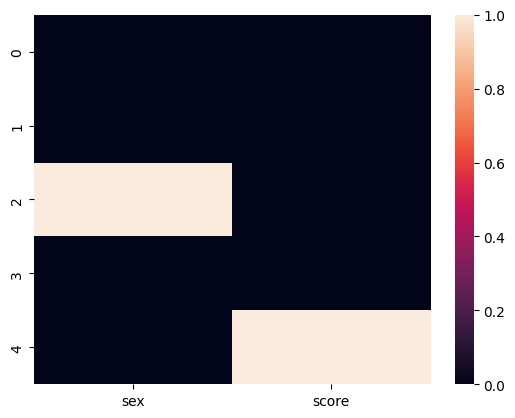

In [28]:
import seaborn as sns
sns.heatmap(df.isnull());

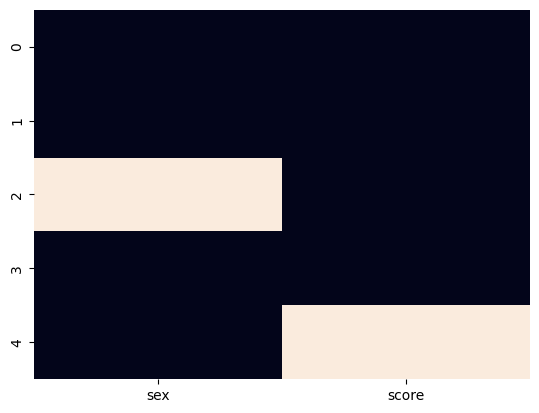

In [29]:
sns.heatmap(df.isnull(), cbar=False);

<Axes: >

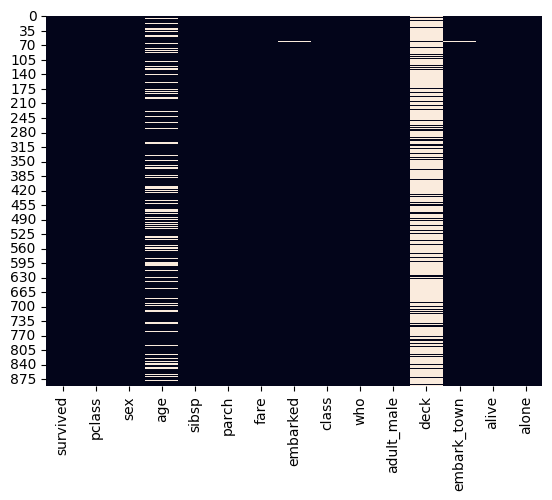

In [30]:
tdf=sns.load_dataset('titanic')
sns.heatmap(tdf.isnull(), cbar=False)

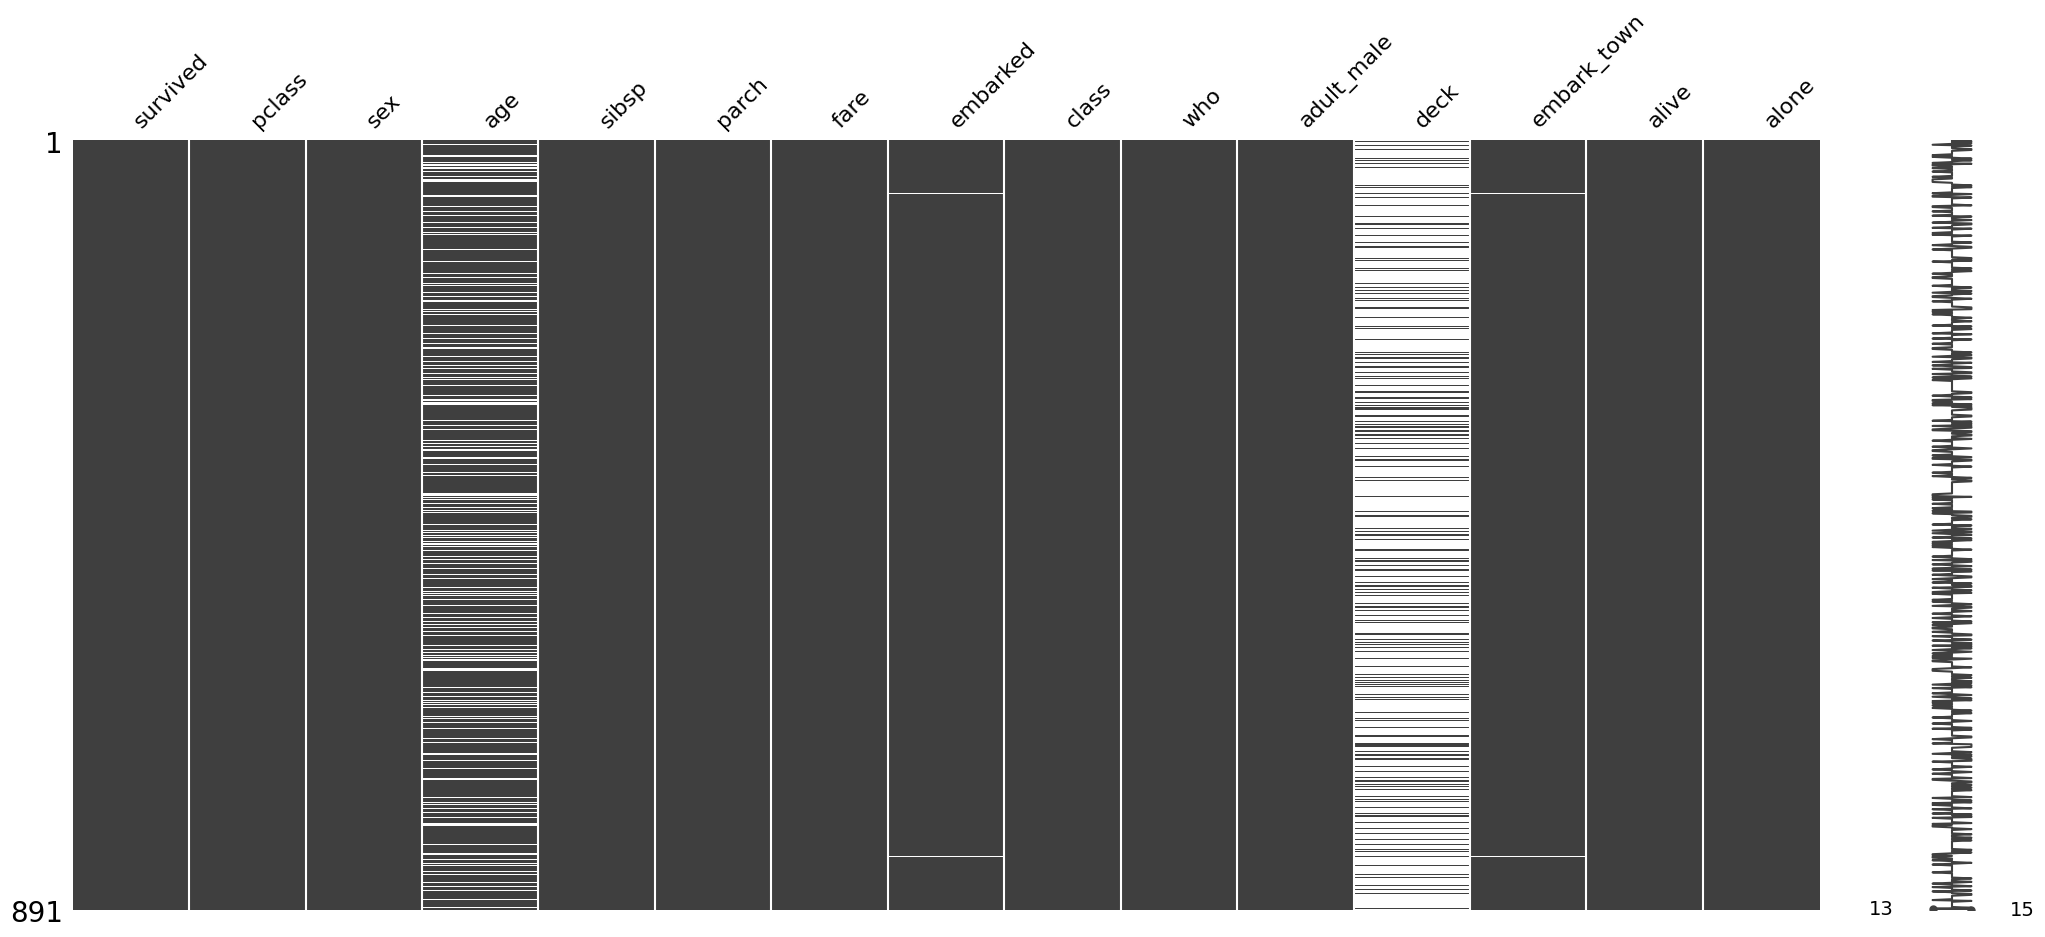

In [31]:
import missingno as msno
msno.matrix(tdf);

In [43]:
#열 embarked가 NaN인 행 추출
tdf[tdf.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [44]:
tdf[(tdf.age.isna()) & (tdf.deck.isna())]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


- 오른쪽의 스파크라인은 데이터 완성도의 일반적인 모양을 요약하고 데이터 세트에서 최대 및 최소 널링이 있는 행을 가리킵니다.
    - 선의 왼족은 15개중 13개의 데이터가 있는 행
    - 선의 오른족은 15개중 15개의 데이터가 있는 행

pandas 문서

In [32]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman', np.nan],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip', np.nan],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"), pd.NaT, pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT
3,NaN,NaN,NaT


In [33]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


#결측치 제거하기

- subset : 열 레이블 또는 레이블 시퀀스(선택 사항)
- 예를 들어 행을 드롭하는 경우, 다른 축인 열을 지정하면 그열에 null이 있는 행을 제거

In [45]:
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT
3,NaN,NaN,NaT


In [35]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [41]:
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT
3,NaN,NaN,NaT


In [46]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [47]:
df['sex'].value_counts()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [48]:
df['sex'].value_counts().sort_values()

sex
3    1
2    2
1    3
Name: count, dtype: int64

In [49]:
df['score'].value_counts()

score
4    2
5    1
3    1
2    1
6    1
Name: count, dtype: int64

In [50]:
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [51]:
# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [52]:
df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [53]:
df.groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [54]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df


,x1
0,1
1,1
2,2
3,2


In [55]:
df['x2'] = np.where(df['x1'] == 1, 10, np.nan)  # 조건에 맞으면 문자 부여
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [56]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [57]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df

,x1
0,1
1,1
2,2
3,2


In [58]:
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)  # 조건에 맞으면 문자열 부여
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [59]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


### 이상치 제거하기 - 극단적인 값

In [60]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')

In [61]:
mpg.sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
64,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,12,16,r,pickup
135,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,16,p,suv
149,nissan,maxima,3.5,2008,6,auto(av),f,19,25,p,midsize


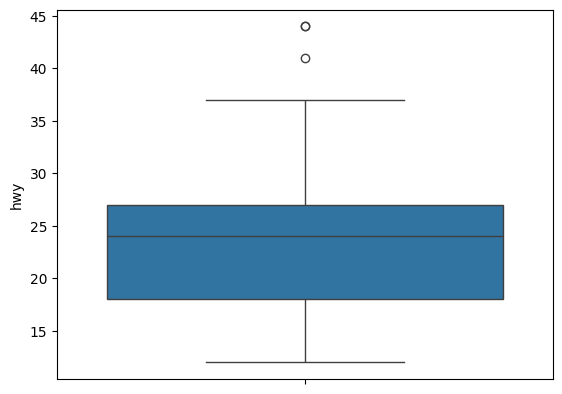

In [62]:
import seaborn as sns
sns.boxplot(mpg, y = 'hwy');

In [63]:
s1 = pd.Series([1, 2, 3, 4, 5])

In [64]:
s1.quantile(.50)

3.0

In [65]:
s1.quantile([.25, .50, .75])

0.25    2.0
0.50    3.0
0.75    4.0
dtype: float64

In [66]:
s2 = pd.Series([1, 2, 4, 5])

In [67]:
s2.quantile(.50)

3.0

In [68]:
  s2.quantile([.25, .50, .75])

0.25    1.75
0.50    3.00
0.75    4.25
dtype: float64

In [69]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [70]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [71]:
iqr = pct75 - pct25
iqr

9.0

In [72]:
pct25 - 1.5 * iqr  # 하한

4.5

In [73]:
pct75 + 1.5 * iqr  # 상한

40.5

In [74]:
mpg['hwy'].describe()

count    234.000000
mean      23.440171
std        5.954643
min       12.000000
25%       18.000000
50%       24.000000
75%       27.000000
max       44.000000
Name: hwy, dtype: float64

In [75]:
mpg['hwy'].describe()['25%']

18.0

In [76]:
dmpg = mpg.dropna(subset = ['hwy'])
len(dmpg)

234

In [77]:
len(mpg)

234

### 3. 극단치를 결측 처리하기

In [78]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')

In [79]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

In [80]:
mpg.dropna(subset = ['hwy']).groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


In [81]:
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000



### 정리하기

In [82]:
## 1. 결측치 정제하기
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
pd.isna(df).sum()                                 # 결측치 확인
df_nomiss = df.dropna(subset = ['score'])         # 결측치 제거
df_nomiss = df.dropna(subset = ['score', 'sex'])  # 여러 변수 동시에 결측치 제거


## 2. 이상치 정제하기

# 이상치 확인
df['sex'].value_counts(sort = False)

# 이상치 결측 처리
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])

# 상자 그림으로 극단치 기준값 찾기
pct25 = mpg['hwy'].quantile(.25)  # 1사분위수
pct75 = mpg['hwy'].quantile(.75)  # 3사분위수
iqr = pct75 - pct25               # IQR
pct25 - 1.5 * iqr                 # 하한
pct75 + 1.5 * iqr                 # 상한

# 극단치 결측 처리
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

### 종료
